<a href="https://colab.research.google.com/github/kim1minjii/pythondemo/blob/master/python_13_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/python_demo

/content/drive/MyDrive/python_demo


In [ ]:
!pwd

/content/drive/MyDrive/python_demo


###1.크롤링(crowling), 스크래핑(scraping), 파싱(parsing)
 - 크롤링(crawling) : 웹문서의 하이퍼링크를 타고 들어가는 행위로 스파이더링(spidering)라고도 한다.
 - 스크래핑(scraping) : 웹사이트에서 원하는 정보를 추출하는 기술
 - 파싱(parcing) : 추출한 정보를 분석하는 기술


2.파이썬에서 제공해주는 크롤링 라이브러리
- urllib 모듈 : 파이썬에서 내장 모듈
- request 모듈 : 외부모듈

3. 외부 라이브러리
- 정적 : BeautifulSoup
- 동적 : Selenium


4. BeautifulSoup
- HTML과 XML 문서의 parsing을 하기 위한 python패키지이므로 이 라이브러리를 이용해 정보를 추출한다.
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://beautiful-soup-4.readthedocs.io/en/latest/


5. Selenium (ex 매크로)
- 'Web Application'의 테스트를 자동화하기 위한 도구이다.
- Selenium에서 웹브라우저를 실행시킨 후 클릭을 하거나, 텍스트를 입력하고, 지우는 등의 조작에 해당하는 메소드를 지원한다.
- 팝업을 닫아줘야만 정상적으로 화면을 볼 수 있는 웹사이트도 있다.  
  그리고 사용하는 이유 중 가장 중요한 게 바로 동적 페이지(JavaScript)로   제공하는 HTML인 경우이다.
- 크롤링 하는 도구는 BeautifulSoup을 사용하지만 동적으로 제어해주는 도구는 Selenium을 사용한다.

- !pip install selenium(https://www.selenium.dev/_
- chromedriver.exe 다운로드(https://chromedriver.chromium.org/downloads)

6. 크롤러(crawler)
- 자동으로 웹페이지에 있는 정보를 수집하는 프로그램
- 크롤러를 '봇', '로봇', '스파이더'라고 한다.
- 구글 등의 검색 엔진은 봇 크롤러를 사용해 전 세계에 있는 웹페이지의 정보를 모아서 축적한다. 그리고 사용자가 키워드를 검색하면 축적된 방대한 정보에서 적당한 웹페이지를 찾아서 제공해 준다.



###2.urllib 모듈
- URL문자열과 웹 요청에 관련된 모듈 5개 제공
 - urllib.request : URL문자열을 가지고 요청기능 제공
 - urllib.response : urlib모듈에 의해 사용되는 응답 클래스들 제공
 - urllib.parse : URL문자열을 파싱하여 해석하는 기능 제공
 - urllib.error : urllib.request에 의해 발생하는 예외 클래스 제공
 - urllib.robotparser : robots.txt파일을 구문 분석하는 기능 제공

In [ ]:
import urllib.request
from urllib.request import urlopen

In [ ]:
url = 'http://www.naver.com'
html = urlopen(url)
print(html.status) #응답코스 200(정상적으로 응답을 받음)
print(type(html)) #<class 'http.client.HTTPResponse'>
print(dir(html))
lines = html.read().decode('utf-8')
#print(lines)

with open('./urllib_naver.txt', 'w', encoding = 'utf-8') as f:
    f.write(lines)

200
<class 'http.client.HTTPResponse'>
['__abstractmethods__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_abc_impl', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_check_close', '_close_conn', '_get_chunk_left', '_method', '_peek_chunked', '_read1_chunked', '_read_and_discard_trailer', '_read_next_chunk_size', '_read_status', '_readall_chunked', '_readinto_chunked', '_safe_read', '_safe_readinto', 'begin', 'chunk_left', 'chunked', 'close', 'closed', 'code', 'debuglevel', 'detach', 'fileno', 'flush', 'fp', 'getcode', 'getheader', 'getheaders', 'geturl', 'headers', 'info', 'isatty', 'isclosed', 'length', 'msg', 'peek', 'r

In [ ]:
with open('./urllib_naver.txt', 'r') as f:
#  print(f.read())
  print(f.read())
  print()

####http.client.HTTPResponse객체의 메소드
- read() 메서드를 실행하면 웹 서버가 전달한 데이터(응답 바디)를 바이트열로 읽어 들인다.
- 바이트열
 - 16진수로 이루어진 수열이기 때문에 읽기 어려우므로 웹 서버가 보낸 한글을 포함한 텍스트 형식의 HTML문서의 내용을 읽을 때는 텍스트 형식으로 변환한다.
 - 바이트열(bytes)의 decode('문자셋') 메소드를 실행하여 응답된 문자 셋에 알맞은 문자로 변환한다.
 

####웹페이지 인코딩 체크
- 웹 크롤링하려는 웹페이지가 어떠한 문자셋으로 작성되었는지 파악하는 것이 필수이다.
  - 페이지의 소스 내용에서 <meta>태그의 charset정보를 체크하면 파악 가능하다.
    - ```<meta charset="utf-8">```
  - 웹페이지의 문자셋 정보를 파이썬 프로그램으로도 파악할 수 있다.
    - urllib.request.urlopen( ) 함수의 리턴값인 http.client.HTTPResponse객체의 info() 메소드 호출
    - http.client.HTTPMessage 객체가 리턴
    - get_content_charset()메소드 호출
    - 문자 셋 정보를 문자열로 리턴 받음

In [ ]:
url = 'http://www.naver.com'
f = urllib.request.urlopen(url)
print(f) #HTTPResponse
print(dir(type(f.info())))
encoding = f.info().get_content_charset()
print(encoding)

['__bytes__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_params_preserve', 'add_header', 'as_bytes', 'as_string', 'attach', 'del_param', 'get', 'get_all', 'get_boundary', 'get_charset', 'get_charsets', 'get_content_charset', 'get_content_disposition', 'get_content_maintype', 'get_content_subtype', 'get_content_type', 'get_default_type', 'get_filename', 'get_param', 'get_params', 'get_payload', 'get_unixfrom', 'getallmatchingheaders', 'is_multipart', 'items', 'keys', 'raw_items', 'replace_header', 'set_boundary', 'set_charset', 'set_default_type', 'set_param', 'set_payload', 'set_raw', 'set_type', 'set_

### 3.requests 모듈
- Kenneth Reitz에 의해 개발된 파이썬 라이브러리이다.
- HTTP 프로토콜과 관련된 기능을 지원한다.
- anaconda에서는 site-package로 설치되어 있음
  - 만약에 필요하면 !pip install requests
- requests에서 제공해주는 함수 request()
  - requests.request(method, url, **kwargs)에서 제공해주는 함수
  - method : 요청 방식 지정(GET, POST, HEAD, PUT, DELETE, OPTIONS)
  - url : 요청할 대상 URL 문자열 저장
  - params : [선택적] 요청 시 전달 할 Query문자열 지정(딕셔너리, 튜플, 리스트, 바이트열 가능)
  - data : [선택적] 요청 시 바디에 담아서 전달 할 요청 파라미터 지정(딕셔너리, 튜플, 리스트, 바이트열 가능)
  - json : [선택적] 요청 시 바디에 담아서 전달할 json타입의 객체 지정
  - auth : [선택적] 인증처리(로그인)에 사용 할 튜플 지정
- requests.request()함수에 요청 방식을 지정하여 호출하는 것과 동일한 함수를 지원한다.
  - requests.get(url, params-None, **kwargs)
  - requests.post(url, data=None, json=None)
  - requests.delete(url,**kwargs)
- requests.models.Response객체(응답객체)
  - text
    - 문자열 형식으로 응답 컨텐츠 추출
    - 추출 시 사용되는 문자셋은 'ISO-8859-1'이므로 'utf-8'이나 'ecu-kr'
    문자셋으로 작성된 콘텐츠 추출 시 한글이 깨지는 현상 발생
    - 추출 전 응답되는 컨텐츠의 문자셋 정보를 파악하여 Response객체의 encoding속성에 문자셋 정보를 설정한 후 추출
 
  - content
    - 바이트열 형식으로 응답 콘텐츠 추출
    - 응답 콘텐츠가 이미지와 같은 바이너리 형식인 경우 사용
    - 한글이 들어간 문자열 형식인 경우 r.content.decode('utf-8')을 사용해서 디코드 해야함

<Response [200]>
<class 'requests.models.Response'>
['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']
200
<class 'str'>
<class 'bytes'>
b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</titl
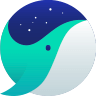
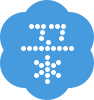

In [ ]:
import requests

url = 'http://www.naver.com'
cont = requests.get(url)
print(cont) #<Response [200]>
cont #<Response [200]>
print(type(cont)) #<class 'requests.models.Response'>
print(dir(cont))
print(cont.status_code) #200
print(type(cont.text))
#print(cont.text) #String 자료형으로 반환
print(type(cont.content))
print(cont.content) #바이트열 자료형으로 반환



###4.urllib VS request
- urllib  
  - 인코딩하여 바이너리 형태로 데이터 전송
  - 데이터 전달 방식에 따라 GET요청, POST요청을 구분
- requests
  - 딕셔너리 형태로 데이터 전송
  - 요청 메소드 (GET, POST)를 명시하여 요청

###5.BeautifulSoup
- HTML 및 XML파일에서 데이터를 추출하기 위한 파이썬 라이브러리이다.
- 파이썬에서 기본적으로 제공하는 라이브러리가 아니므로 별도 설치가 필요하다.
 - Anaconda에는 BeautifulSoup 패키지가 Site-package로 설치되어 있다.
 - pip install beautifulSoup4
- HTML 및 XML 파일의 내용을 읽을 때 다음 파서(Parser)를 이용한다.
 - html.parser, lxml, lxml-xml, html5lib
 - 파이썬이 내장하고 있는 파서 사용 가능
 - 좀 더 성능이 좋은 파서를 추가로 설치하여 사용 가능
 - 파서 라이브러리(Parser Library)비교
#![parser](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc28GWb%2FbtqCtX7fBRN%2FnRwJ7DSP8dtjjBxGwfGv10%2Fimg.png)

- HTML파싱
 - BeautifulSoup의 메인 패키지인 bs 패키지에서 BeautifulSoup()함수 임포트
 - 파싱할 HTML문서와 파싱에 사용 할 파서(구문분석기)를 지정하여 호출
 - HTML 문서에 대한 파싱이 끝나면 트리 구조 형식으로 DOM객체 생성

- bs4.BeautifulSoup 객체의 태그 접근 방법
 1. HTML문서를 파싱하고 bs4.BeautifulSoup 객체 생성
 2. <html>, <head>태그와 <body>태그는 제외하고 접근하려는 태그에 계층 구조를 적용
 3. 태그명을 '.' 연산자와 함께 사용
  - bs.태그명
  - bs.태그명.태그명
  - bs.태그명.태그명.태그명
  - bs.html.body.h1

- bs4.element.Tag 객체의 주요 속성과 메서드
  - 태그명 추출
    - bs.태그명.name
  - 속성 추출
    - bs.태그명['속성명']
    - bs.태그명.attrs
  - 콘텐츠 추출
    - bs.태그명.string
    - bs.태그명.text
    - bs.태그명.contents
    - bs.태그명.strings
    - bs.태그명.get_text()
- 태그로 부터 다른 태그로 이동
  - 부모 태그 추출
    - bs.태그명.parent
  - 자식 태그들 추출
    - bs.태그명.children
  - 형제 태그 추출
    - bs.태그명.next_sibling
    - bs.태그명.previous_sibling
    - bs.태그명.enxt_siblings
    - bs.태그명.previous_siblings
  - 자손 태그들 추출
    - bs.태그명.descendants

- bs4.BeautifulSoup 객체의 주요 메소드
  - HTML 문서에 대한 파싱이 끝나고 생성된 트리 구조 형식의 DOM객체
  - 태그 찾기 기능의 주요 메소드
    - find_all( ) python3버전 => findAll( ) python2버전
    - find( )
    - select( )
    - find_parents( ) 및 find_parent( )
    - find_next_siblings( ) 및 find_next_sibling( )
    - find_previous_siblings( ) 및 find_previous_sibling( )
    - find_all_next( ) 및 find_next( )
    - first_all_previous( ) 및 first_previous( )


  

####bs.find( )
- 주어진 기준에 맞는 태그 한 개만 리턴
- 결과는 존재하면 bs4.element.Tag 리턴하고, 존재하지 않으면 None을 리턴한다.
- find()는 find_all()에 limit=1로 설정한 것과 동일하게 수행

In [ ]:
import requests
import bs4

url = 'http://www.naver.com'
res = requests.get(url)

#print(res.text) : 문자열

#BeautifulSoup(parsing할 데이터, parsing방법)
#res.text를 html으로 파싱
bs_obj2 = bs4.BeautifulSoup(res.text, 'html.parser')
#print(bs_obj2) 길어서 주석처리
print(bs_obj2.find('div'))

print('-----------------------------')
bs_obj3 = bs4.BeautifulSoup(res.text, 'lxml')
print(type(bs_obj3))
print(type(bs_obj3.find('div')))
bs_obj3.find('xk') #안가져옴(결과값이 없어서)
print(bs_obj3.find('xk')) #None으로 리턴
bs_obj3.find('div')

<div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div>
-----------------------------
<class 'bs4.BeautifulSoup'>
<class 'bs4.element.Tag'>
None


<div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div>

### 소스 예제

In [ ]:


html_str = """<!DOCTYPE html>
<html>
  <body>
    <ul class="ko">
      <li>
      <p>Previous Element1</p>
      <p>Previous Element2</p>
          <a href = "https://www.naver.com">네이버</a>
          <p>Next Element1</p>
          <p>Next Element2</p>
      </li>
      <li>
          <a href = "https://www.daum.net">다음</a>
      </li>     
    </ul>

    <ul class="sns">
      <li>
        <a href="https://www.google.com">구글</a>
      </li>
      <li>
        <a href="https://www.facebook.com">페이스북</a>
      </li>
    </ul>
    <div id="result">page</div>
  </body>
</html>
"""

In [ ]:
import bs4
bs_obj = bs4.BeautifulSoup(html_str, 'html.parser')

####find()

In [ ]:
print(type(bs_obj)) #<class 'bs4.BeautifulSoup'>

<class 'bs4.BeautifulSoup'>


In [ ]:
print(bs_obj.find('div')) #<div id=" result">page</div>
print(type(bs_obj.find('div'))) #<class 'bs4.element.Tag'>
print(dir(bs_obj.find('div')))
print(bs_obj.find('div').text)

<div id=" result">page</div>
<class 'bs4.element.Tag'>
['HTML_FORMATTERS', 'XML_FORMATTERS', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_attr_value_as_string', '_attribute_checker', '_find_all', '_find_one', '_formatter_for_name', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_select_debug', '_selector_combinators', '_should_pretty_print', '_tag_name_matches_and', 'append', 'attribselect_re', 'attrs', 'can_be_empty_element', 'childGenerator', 'children', 'clear', 'contents', 'decode', 'decode_contents', 'decompose', '

In [ ]:
ulEle = bs_obj.find('ul')
print(ulEle)
print('--------------------------')
ul_li = ulEle.find('li')
print(ul_li)
print(type(ul_li)) #<class 'bs4.element.Tag'>
print(ul_li.text)

<ul class-"kp="">
<li>
<a href="https://www.naver.com">네이버</a>
</li>
<li>
<a href="https://www.daum.net">다음</a>
</li>
</ul>
--------------------------
<li>
<a href="https://www.naver.com">네이버</a>
</li>
<class 'bs4.element.Tag'>

네이버



#### find_all( )
- 주어진 기준에 맞는 모든 태그들을 가져옴
- 결과는 bs4.element.ResultSet 객체로 리턴
- 호출 방법
  - find_all('div')
  - find_all(['p', 'img'])
  - find_all(True)
  - find_all(re.compile('^b')) #b로 시작하는
  - find_all(id='link')
  - find_all(src=re.compile('png$'), id='fid' #png로 끝나는/id가 fid일 때
  - find_all('a', limit=2)

In [ ]:
ul = bs_obj.find('ul')
ul_li = ul.find_all('li')
print(ul_li)
print(type(ul_li)) #<class 'bs4.element.ResultSet'>
print(dir(ul_li))

print(ul_li[0])
print(ul_li[1])

for element in ul_li:
  print(element.text)

[<li>
<a href="https://www.naver.com">네이버</a>
</li>, <li>
<a href="https://www.daum.net">다음</a>
</li>]
<class 'bs4.element.ResultSet'>
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort', 'source']
<li>
<a href="https://www.naver.com">네이버</a>
</li>
<li>
<a href="https://www.daum.net">다음</a>
</li>

네이버


다음



####class속성 이용하기 tag_and_property

In [ ]:
ul_reply = bs_obj.find('ul')
print(ul_reply)
print('------------------------')

ul_ko = bs_obj.find('ul', {'class':'ko'})
print(ul_ko)
print('==================================')
ul_sns = bs_obj.find('ul', attrs={'class':'sns'})
print(ul_sns)

print('------------------------')
ul_li = ul_sns.find_all('li')
for li in ul_li:
  print(li.text)

<ul class-"kp="">
<li>
<a href="https://www.naver.com">네이버</a>
</li>
<li>
<a href="https://www.daum.net">다음</a>
</li>
</ul>
------------------------
None
<ul class="sns">
<li>
<a href="https://www.google.com">구글</a>
</li>
<li>
<a href="https://www.facebook.com">페이스북</a>
<li></li>
</li></ul>
------------------------

구글


페이스북





###속성값 가져오기 property_href

In [ ]:
atag = bs_obj.find('a')
print(atag)
print(atag['href'])
print(type(atag['href']))

<a href="https://www.naver.com">네이버</a>
https://www.naver.com
<class 'str'>


In [ ]:
atag = bs_obj.find_all('a')
print(atag)
print(len(atag))

print('-----------------------------')
for atn in atag:
  print(atn['href'])

[<a href="https://www.naver.com">네이버</a>, <a href="https://www.daum.net">다음</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
4
-----------------------------
https://www.naver.com
https://www.daum.net
https://www.google.com
https://www.facebook.com


In [ ]:
bs_obj.find('a').attrs
print(type(bs_obj.find('a').attrs))

<class 'dict'>


In [ ]:
#id 속성의 값이 'result'인 태그를 가져온다.
dv = bs_obj.find(id='result')
print(dv)
print(type(dv))

<div id="result">page</div>
<class 'bs4.element.Tag'>


In [ ]:
#uclass = bs_obj.find(class_='ko') #class_ 언더바중요
uclass = bs_obj.find(True, {'class':'ko'})
print(uclass)
print('===================================')
uclass = bs_obj.find(False, {'class':'ko'})
#uclass = bs_obj.find('*', {'class':'ko'}) #None
print(uclass)


<ul class="ko">
<li>
<a href="https://www.naver.com">네이버</a>
</li>
<li>
<a href="https://www.daum.net">다음</a>
</li>
</ul>
<ul class="ko">
<li>
<a href="https://www.naver.com">네이버</a>
</li>
<li>
<a href="https://www.daum.net">다음</a>
</li>
</ul>


In [ ]:
print(bs_obj.find('a'))
print(bs_obj.a)

print(bs_obj.find('a').get_text())
print(type(bs_obj.find('a').get_text())) 
print(bs_obj.a.get_text())
print(type(bs_obj.a.get_text())) #get_text() 이용

#get_text()
#https://www.crummy.com/software/BeautifulSoup/bs4/doc/#get-text


<a href="https://www.naver.com">네이버</a>
<a href="https://www.naver.com">네이버</a>
네이버
<class 'str'>
네이버
<class 'str'>


In [ ]:
#multi element
print(bs_obj. find_all('a'))

print(bs_obj.find_all('a')[0].get_text())
print(bs_obj.find_all('a')[1].get_text())
print(bs_obj.find_all('a')[2].get_text())

print(type(bs_obj.find_all('a')))
print(type(bs_obj.find('a')))

[<a href="https://www.naver.com">네이버</a>, <a href="https://www.daum.net">다음</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
네이버
다음
구글
<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>


In [ ]:
#attribute
print(bs_obj.attrs)
print(bs_obj.find('a').attrs)

print(bs_obj.a['href'])
print(bs_obj.a.attrs['href'])
print(bs_obj.a.get('href'))

{}
{'href': 'https://www.naver.com'}
https://www.naver.com
https://www.naver.com
https://www.naver.com


In [ ]:
#children
print(bs_obj.ul.children)
print(type(bs_obj.ul.children))

for sub in bs_obj.ul.children:
  print(sub)

  print('================================')
 # for sub in bs_obj.ul[1].children:
 #   print(sub)
  for sub in bs_obj.find_all('ul')[1].children:
    print(sub)

<class 'list_iterator'>




<li>
<a href="https://www.google.com">구글</a>
</li>


<li>
<a href="https://www.facebook.com">페이스북</a>
</li>


<li>
<a href="https://www.naver.com">네이버</a>
</li>


<li>
<a href="https://www.google.com">구글</a>
</li>


<li>
<a href="https://www.facebook.com">페이스북</a>
</li>






<li>
<a href="https://www.google.com">구글</a>
</li>


<li>
<a href="https://www.facebook.com">페이스북</a>
</li>


<li>
<a href="https://www.daum.net">다음</a>
</li>


<li>
<a href="https://www.google.com">구글</a>
</li>


<li>
<a href="https://www.facebook.com">페이스북</a>
</li>






<li>
<a href="https://www.google.com">구글</a>
</li>


<li>
<a href="https://www.facebook.com">페이스북</a>
</li>




In [ ]:
#sibling
print(bs_obj.find('a').next_siblings) #모든 다음 요소를 가지고 와라
ele = bs_obj.find('a').next_siblings
#next(ele)
#print(len(ele)) #TypeError: object of type 'generator' has no len()

cnt = 0
for subNext in ele:
  cnt += 1
  print(subNext)
print(cnt)

<generator object PageElement.next_siblings at 0x7f0f7b928900>


<p>Next Element1</p>


<p>Next Element2</p>


5


In [ ]:
#정규 표현식과 람다식
import re

print(bs_obj.find('a', {'href':'https://www.naver.com'}))
print(bs_obj.find('a', {'href':re.compile('.*com')}))
print(bs_obj.find('a', {'href':re.compile('.*naver.*')}))
print(bs_obj.find('a', {'href':re.compile('naver')}))

print("====================================================")
print(bs_obj.find_all('a', {'href':re.compile('.*com')}))
print(bs_obj.find_all('a', {'href':re.compile('.*naver.*')}))
print(bs_obj.find_all('a', {'href':re.compile('naver')}))

print("====================================================")
print(bs_obj.find(href=lambda val : val))
print(bs_obj.find(href=lambda val : val and 'daum' in val))
print("====================================================")
print(bs_obj.find(class_=lambda val : val))
print("====================================================")
print(bs_obj.find(class_=lambda val : val and 'sns' in val))

<a href="https://www.naver.com">네이버</a>
<a href="https://www.naver.com">네이버</a>
<a href="https://www.naver.com">네이버</a>
<a href="https://www.naver.com">네이버</a>
[<a href="https://www.naver.com">네이버</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
[<a href="https://www.naver.com">네이버</a>]
[<a href="https://www.naver.com">네이버</a>]
<a href="https://www.naver.com">네이버</a>
<a href="https://www.daum.net">다음</a>
<ul class="ko">
<li>
<p>Previous Element1</p>
<p>Previous Element2</p>
<a href="https://www.naver.com">네이버</a>
<p>Next Element1</p>
<p>Next Element2</p>
</li>
<li>
<a href="https://www.daum.net">다음</a>
</li>
</ul>
<ul class="sns">
<li>
<a href="https://www.google.com">구글</a>
</li>
<li>
<a href="https://www.facebook.com">페이스북</a>
</li>
</ul>


#### select( ) vs select_one( )
- 주어진 CSS 선택자에 맞는 모든 태그를 가져온다.
- 결과는  list객체로 리턴된다.
- CSS선택자를 적용한 호추
  - select('태그명')
  - select('.클래스명')
  - select('#아이디명')
  - select('태그명.클래스명')
  - select('상위태그명>자식태그명>손자태그명')
  - select('태그명:nth-of-type(2)')
  - select('태그명[속성]')

In [ ]:
ul = bs_obj.select_one('ul')
print(ul)
print(type(ul))
print('----------------------------')
ul_li = bs_obj.select_one('ul > li') # > 양쪽에 공백 처리해야 함
print(ul_li)

<ul class="ko">
<li>
<p>Previous Element1</p>
<p>Previous Element2</p>
<a href="https://www.naver.com">네이버</a>
<p>Next Element1</p>
<p>Next Element2</p>
</li>
<li>
<a href="https://www.daum.net">다음</a>
</li>
</ul>
<class 'bs4.element.Tag'>
----------------------------
<li>
<p>Previous Element1</p>
<p>Previous Element2</p>
<a href="https://www.naver.com">네이버</a>
<p>Next Element1</p>
<p>Next Element2</p>
</li>


In [ ]:
print(bs_obj.select('a'))
print(type(bs_obj.select('a'))) #<class 'list'>

[<a href="https://www.naver.com">네이버</a>, <a href="https://www.daum.net">다음</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
<class 'list'>


In [ ]:
bs_obj.select('.ko')

[<ul class="ko">
 <li>
 <p>Previous Element1</p>
 <p>Previous Element2</p>
 <a href="https://www.naver.com">네이버</a>
 <p>Next Element1</p>
 <p>Next Element2</p>
 </li>
 <li>
 <a href="https://www.daum.net">다음</a>
 </li>
 </ul>]

In [ ]:
bs_obj.select('#result')

[<div id="result">page</div>]

In [ ]:
#nth_child(n) : 부모 엘리먼트의 모든 자식 엘리먼트 중 n번째
#nth_of_type(n) : 부모 엘리먼트의 특정 자식 엘리먼트 중 n번째
bs_obj.select('ul.sns > li:nth-of-type(2)')

[<li>
 <a href="https://www.facebook.com">페이스북</a>
 </li>]

In [ ]:
ul_li = bs_obj.select('ul > li')
print(ul_li)
print('-------------------------------')
for liElement in ul_li:
  #print(liElement)
  print(liElement.text)

[<li>
<p>Previous Element1</p>
<p>Previous Element2</p>
<a href="https://www.naver.com">네이버</a>
<p>Next Element1</p>
<p>Next Element2</p>
</li>, <li>
<a href="https://www.daum.net">다음</a>
</li>, <li>
<a href="https://www.google.com">구글</a>
</li>, <li>
<a href="https://www.facebook.com">페이스북</a>
</li>]
-------------------------------

Previous Element1
Previous Element2
네이버
Next Element1
Next Element2


다음


구글


페이스북



In [ ]:
print(bs_obj.select_one('a'))

print(type(bs_obj.select_one('a'))) #find('a')와 타입이 같음
print(type(bs_obj.select('a'))) #find_all('a') 리턴타입이 ResultSet이므로 다르다.

<a href="https://www.naver.com">네이버</a>
<class 'bs4.element.Tag'>
<class 'list'>


### 응답코드가 406일 때 문제해결 방법
 - 웹 url을 통해서 데이터를 가져올 때 요청에 유저(사용자) 에이전트 헤더를 검사한다.
 - 그리고 urllib.request.urlopen은 SSL인증서 에러가 난다.
 - 문제해결방법
   - requests.get(url headers=header)

In [ ]:
import bs4
import requests

url = 'https://www.melon.com/'
header={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"}
res = requests.get(url,headers=header)
print(res) #<Response [406]>

bs_melon = bs4.BeautifulSoup(res.text, 'html.parser')
print(type(bs_melon))
#print(bs_melon)


<Response [200]>
<class 'bs4.BeautifulSoup'>


GET 방식의 Request

In [ ]:
def getDownload( url, param = None, retries = 5 ):
    resp = None
    try:
        resp = requests.get( url, params = param )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, param, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    return resp


In [ ]:
url = 'http://www.crawler-test.com/status_codes/status_500'
getDownload( url )


Retries : 5
Retries : 4
Retries : 3
Retries : 2
Retries : 1
500
Internal Server Error
{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


<Response [500]>

### POST 방식 request

In [ ]:
def postDownload( url, data = None, param = None, retries = 3 ):
    resp = None
    try:
        resp = requests.post( url, data, params = param )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return postDownload( url, param, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    return resp

In [ ]:
url = 'http://pythonscraping.com/pages/files/processing.php'
data = { 'firstname':'테스트', 'lastname':1234 }

In [ ]:
html = postDownload( url, data )
print( html.request.body )
print( '------------------------------' )
print( html.request.headers )
html.text


None
------------------------------
{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


'Hello there,  !'

naver에서 class속성의 값이 2개 이상일 때

In [ ]:
url = requests.get('https://news.naver.com')
print(url)
print(type(url))

html = bs4.BeautifulSoup(url.text, 'html.parser')

newsnow = html.find('div',{'class' : 'cjs_journal_wrap _item_contents'})
#print(newsnow)
print(re.findall('[a-z가-힣]+', newsnow.text))

<Response [200]>
<class 'requests.models.Response'>
['인천', '다세대주택서', '불', '집', '안에', '있던', '살', '아들', '사망', '인천의', '한', '다세대주택에서', '불이', '나', '집', '안에', '있던', '부자가', '심정지', '상태로', '발견된', '가운데', '살', '된', '아들이', '끝내', '숨졌다', '일', '경찰과', '소방', '당국에', '따르면', '이날', '오후', '시', '분께', '인천시', '계양구', '작전동', '층짜리', '빌라', '층에서']


In [ ]:
url = requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20221208')
print(url)
print(type(url))

html = bs4.BeautifulSoup(url.text, 'html.parser')

movie = html.find('h4',{'class' : 'tlt'})
#print(movie)
print(re.findall('[a-z가-힣]+', movie.text))

<Response [200]>
<class 'requests.models.Response'>
['전체', '드라마', '판타지', '공포', '멜로', '애정', '로맨스', '모험', '스릴러', '느와르', '다큐멘터리', '코미디', '가족', '미스터리', '전쟁', '애니메이션', '범죄', '뮤지컬', '액션']


In [ ]:
url = requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20221208')
print(url)
print(type(url))

html = bs4.BeautifulSoup(url.text, 'html.parser')

movie = html.find('table',{'class' : 'list_ranking'})
#print(movie)
print(re.findall('[a-z가-힣]+', movie.text))

<Response [200]>
<class 'requests.models.Response'>
['랭킹', '테이블', '순위', '영화명', '평점', '변동폭', '탑건', '매버릭', '평점주기', '인생은', '뷰티풀', '비타돌체', '평점주기', '클라우스', '평점주기', '할머니의', '먼', '집', '평점주기', '밥정', '평점주기', '그린', '북', '평점주기', '가버나움', '평점주기', '베일리', '어게인', '평점주기', '원더', '평점주기', '아일라', '평점주기', '디지몬', '어드벤처', '라스트', '에볼루션', '인연', '평점주기', '극장판', '바이올렛', '에버가든', '평점주기', '당갈', '평점주기', '아바타', '리마스터링', '평점주기', '포드', '페라리', '평점주기', '먼', '훗날', '우리', '평점주기', '주전장', '평점주기', '쇼생크', '탈출', '평점주기', '터미네이터', '오리지널', '평점주기', '덕구', '평점주기', '클래식', '평점주기', '라이언', '일병', '구하기', '평점주기', '나', '홀로', '집에', '평점주기', '장민호', '드라마', '최종회', '평점주기', '그대', '고맙소', '김호중', '생애', '첫', '팬미팅', '무비', '평점주기', '명탐정', '코난', '할로윈의', '신부', '평점주기', '월', '평점주기', '빽', '투', '더', '퓨쳐', '평점주기', '사운드', '오브', '뮤직', '평점주기', '보헤미안', '랩소디', '평점주기', '포레스트', '검프', '평점주기', '타이타닉', '평점주기', '글래디에이터', '평점주기', '위대한', '쇼맨', '평점주기', '인생은', '아름다워', '평점주기', '살인의', '추억', '평점주기', '매트릭스', '평점주기', '헬프', '평점주기', '센과', '치히로의', '행방불명', '평점주기', '태극권', '평점주기', '캐스트', '어